### Problem 1 (50 points) 

Vapor-liquid equilibria data are correlated using two adjustable parameters $A_{12}$ and $A_{21}$ per binary
mixture. For low pressures, the equilibrium relation can be formulated as:

$$
\begin{aligned}
p = & x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{water}^{sat}\\
& + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$

Here the saturation pressures are given by the Antoine equation

$$
\log_{10}(p^{sat}) = a_1 - \frac{a_2}{T + a_3},
$$

where $T = 20$($^{\circ}{\rm C}$) and $a_{1,2,3}$ for a water - 1,4 dioxane
system is given below.

|             | $a_1$     | $a_2$      | $a_3$     |
|:------------|:--------|:---------|:--------|
| Water       | 8.07131 | 1730.63  | 233.426 |
| 1,4 dioxane | 7.43155 | 1554.679 | 240.337 |


The following table lists the measured data. Recall that in a binary system $x_1 + x_2 = 1$.

|$x_1$ | 0.0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 |
|:-----|:--------|:---------|:--------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
|$p$| 28.1 | 34.4 | 36.7 | 36.9 | 36.8 | 36.7 | 36.5 | 35.4 | 32.9 | 27.7 | 17.5 |

Estimate $A_{12}$ and $A_{21}$ using data from the above table: 

1. Formulate the least square problem; 
2. Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent or Newton's method implemented in HW1; 
3. Compare your optimized model with the data. Does your model fit well with the data?

---

### Problem 2 (50 points) 

Solve the following problem using Bayesian Optimization:
$$
    \min_{x_1, x_2} \quad \left(4-2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2,
$$
for $x_1 \in [-3,3]$ and $x_2 \in [-2,2]$. A tutorial on Bayesian Optimization can be found [here](https://thuijskens.github.io/2016/12/29/bayesian-optimisation/).





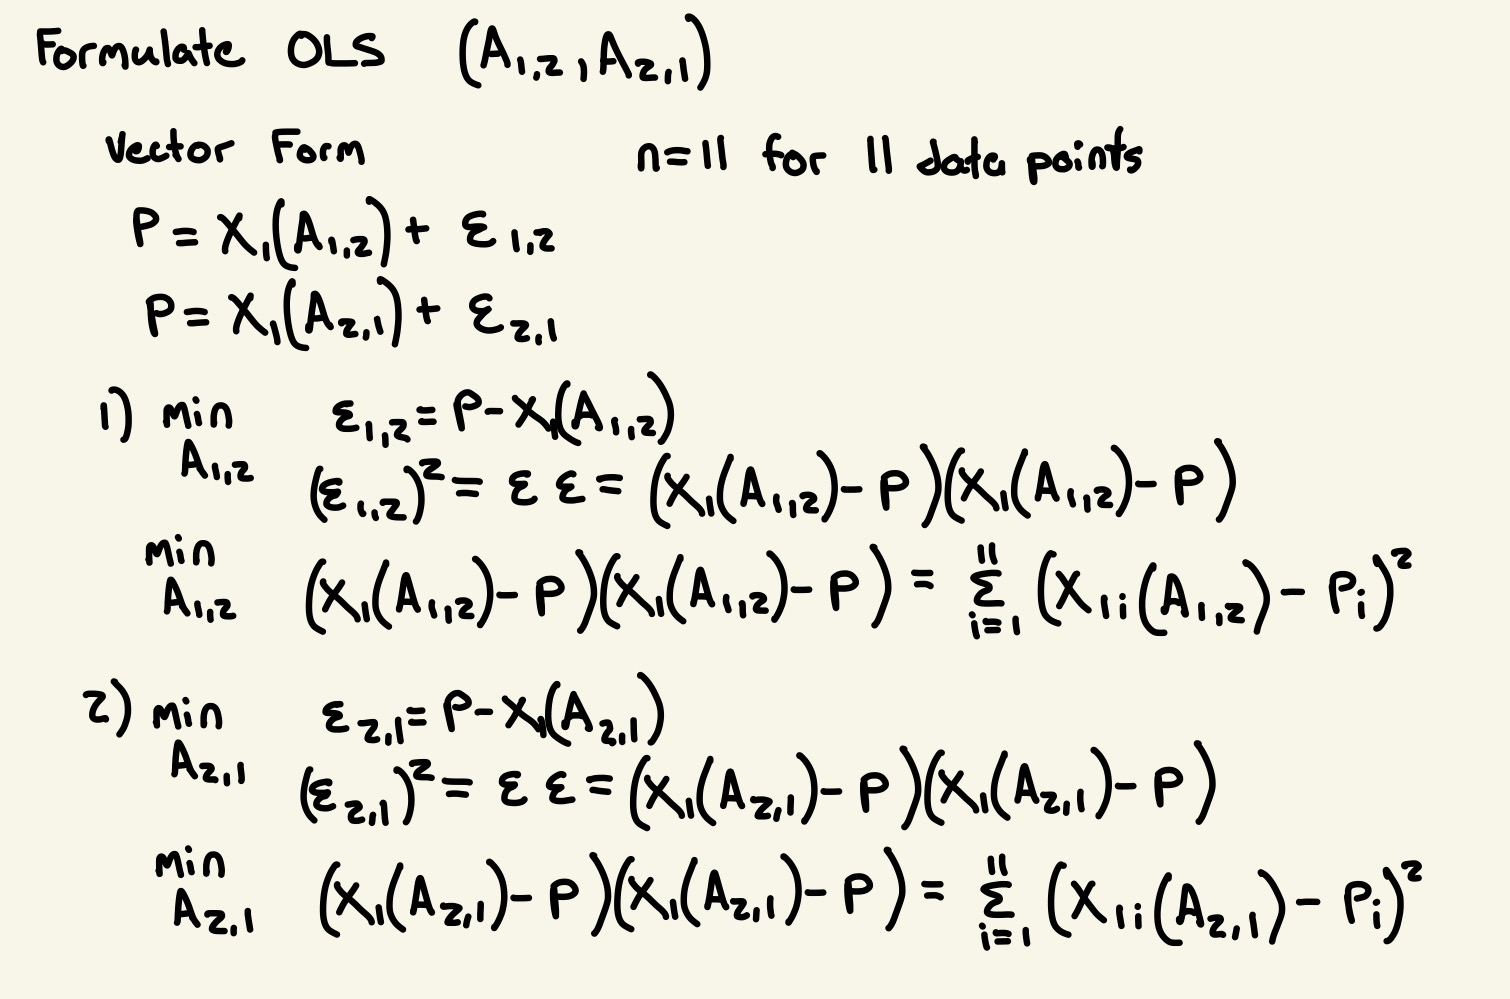

In [108]:
# A simple example of using PyTorch for gradient descent

import torch as t 
#import math
from torch.autograd import Variable

# Finding for A21
# Define a variable, make sure requires_grad=True so that PyTorch can take gradient with respect to this variable
A21 = (t.tensor([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0], requires_grad=True)) #

P = [28.1, 34.3, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5] #P values 

X1 = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.1, 1.2]#X1 values


# Define a loss

for i in range(11) : #loss = loss + i
   
    loss = -(X1[i]*A21[i] - P[i])**2 
    totloss = loss + loss
    totloss.backward()
print(A21.grad)

# Finding for A12

A12 = (t.tensor([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0], requires_grad=True)) #


P = [28.1, 34.3, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5] #P values 

X1 = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.1, 1.2]#X1 values


# Define a loss

for i in range(11) : #loss = loss + i
   
    loss = -(X1[i]*A12[i] - P[i])**2 
    totloss = loss + loss
    totloss.backward()
print(A12.grad)



tensor([11.2000, 27.1200, 42.9600, 56.4800, 68.6000, 79.4400, 88.4800, 92.8000,
        89.2800, 73.4800, 20.6400])
tensor([11.2000, 27.1200, 42.9600, 56.4800, 68.6000, 79.4400, 88.4800, 92.8000,
        89.2800, 73.4800, 20.6400])


The model does not fit the data too well there are lots of deviations between the data in the table and the data found through the model.

In [153]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
def function(X1, X2):
    return (-(4-2.1*X1**2+(X1**4)/3)*X1**2+(-X1*X2)+(-1)*(-4+4*X2**2)*X2**2)
pbounds = {
    'X1' : (-3, 3), 
    'X2' : (-2, 2)}


optimizer = BayesianOptimization(f=function,
                                 pbounds=pbounds,
                                 random_state=1)
optimizer.maximize(
    init_points=2,
    n_iter=1)

print(optimizer.max) 

# Finding Max

from bayes_opt import BayesianOptimization
def function(X1, X2):
    return ((4-2.1*X1**2+(X1**4)/3)*X1**2+(X1*X2)+(-4+4*X2**2)*X2**2)
pbounds = {
    'X1' : (-3, 3), 
    'X2' : (-2, 2)}


optimizer = BayesianOptimization(f=function,
                                 pbounds=pbounds,
                                 random_state=1)
optimizer.maximize(
    init_points=2,
    n_iter=1)

print(optimizer.max)
#Finds minimum function by multiplying by -1 to invert of x axis finding min values

|   iter    |  target   |    X1     |    X2     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -0.4933   | -0.3849   |  1.039    |
{'target': 0.2650082867644827, 'params': {'X1': -0.4978679717845562, 'X2': 0.8812979737686324}}
|   iter    |  target   |    X1     |    X2     |
-------------------------------------------------
|  1        | -0.265    | -0.4979   |  0.8813   |
|  2        |  110.1    | -2.999    | -0.7907   |
|  3        |  71.79    | -2.842    | -0.6775   |
{'target': 110.13991869176739, 'params': {'X1': -2.9993137510959307, 'X2': -0.7906697094726409}}


Knowing the max the minimum can be found by multiplying the function by -1 reflecting the function across the x axis allowing for the minimum instead of the max to be found